In [1]:
import pandas as pd

In [2]:
# Make Manual DataFrame by Dictionary and Values in List
df_data = pd.DataFrame(
                  {'Name': ['John', 'Sally', 'Joe', 'Anthony', 'Jim', 'Alexander', 'Anna'],
                   'Salary':[100000, 108000, 100000, 378000, 110000,  80000, 118000]}
)
df_data.head()

,Name,Salary
0,John,100000
1,Sally,108000
2,Joe,100000
3,Anthony,378000
4,Jim,110000


In [3]:
df_salary = df_data['Salary']
print (df_salary.mean())

142000.0


In [4]:
df_salary = df_data['Salary']
print (df_salary.median())

108000.0


In [5]:
df_salary.value_counts()

100000    2
110000    1
118000    1
108000    1
378000    1
80000     1
Name: Salary, dtype: int64

In [6]:
df_salary.sort_values()

5     80000
0    100000
2    100000
1    108000
4    110000
6    118000
3    378000
Name: Salary, dtype: int64

In [7]:
df_salary.mode()

0    100000
dtype: int64

In [8]:
print ('Min value is: ' + str(df_salary.min()))
print ('Mode is : ' + str(df_salary.mode()[0]))
print ('Median is : ' + str(df_salary.median()))
print ('Mean is : ' + str(df_salary.mean()))
print ('Max is : ' + str(df_salary.max()))

Min value is: 80000
Mode is : 100000
Median is : 108000.0
Mean is : 142000.0
Max is : 378000


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

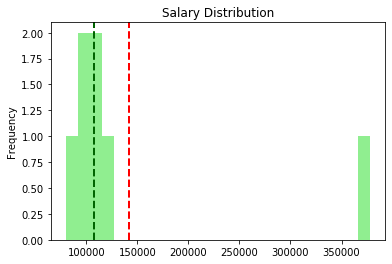

In [10]:
df_salary.plot.hist(title='Salary Distribution', color='lightgreen', bins=25)  
plt.axvline(df_salary.mean(), linestyle='dashed', color='red', linewidth=2)
plt.axvline(df_salary.median(), linestyle='dashed', color='darkgreen', linewidth=2)
plt.show()

In [11]:
import seaborn as sns

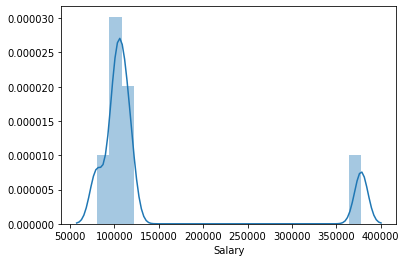

In [12]:
# distribution plot for Histogram
sns.distplot(df_salary)

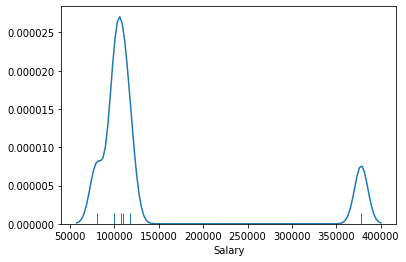

In [13]:
ax = sns.distplot(df_salary, rug=True, hist=False)

In [14]:
# Make a Pandas' Dataframe having the values >=300000
df_out = df_data[df_data.Salary >= 300000]

In [15]:
df_out.head()

,Name,Salary
3,Anthony,378000


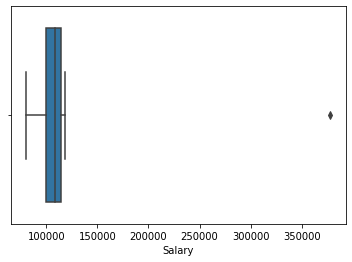

In [16]:
sns.boxplot(x=df_salary)

##### What is KDE?
##### Kernel density estimation or KDE is a non-parametric way to estimate the probability density function of a random variable. In other words the aim of KDE is to find probability density function (PDF) for a given dataset. How it differs from normalized histogram approach? Well, it smooths the around values of PDF. Let's take a look at KDE using Gaussian kernel in multiple examples .

In [17]:
import scipy.stats as stats

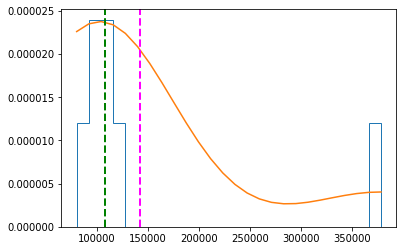

In [18]:
density = stats.gaussian_kde(df_salary)
n, x, _ = plt.hist(df_salary, histtype='step', density=True, bins=25)  
plt.plot(x, density(x)*5)
plt.axvline(df_salary.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df_salary.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

In [19]:
df_data2 = pd.DataFrame(
           {'Name': ['John', 'Sally', 'Joe', 'Anthony', 'Jim', 'Alexander', 'Anna'],
            'Salary':[100000, 108000, 100000, 378000, 110000,  80000, 118000],
            'Hours':[41,40,36,30,35,39,40],
            'Grade':[50,50,46,95,50,5,57]})
df_data2.head()

,Name,Salary,Hours,Grade
0,John,100000,41,50
1,Sally,108000,40,50
2,Joe,100000,36,46
3,Anthony,378000,30,95
4,Jim,110000,35,50


In [20]:
numcols = ['Salary', 'Hours', 'Grade']

In [21]:
for colum in numcols:
    print(df_data2[colum])

0    100000
1    108000
2    100000
3    378000
4    110000
5     80000
6    118000
Name: Salary, dtype: int64
0    41
1    40
2    36
3    30
4    35
5    39
6    40
Name: Hours, dtype: int64
0    50
1    50
2    46
3    95
4    50
5     5
6    57
Name: Grade, dtype: int64


Salary skewness: 2.57316410755049


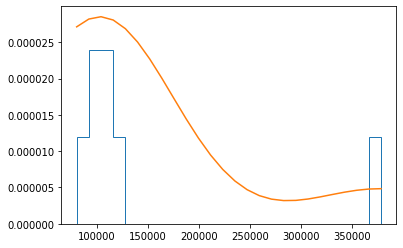



Hours skewness: -1.194570307262883


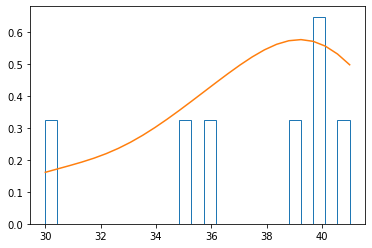



Grade skewness: -0.06512433009682762


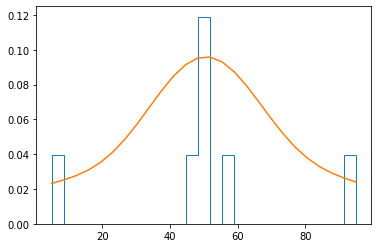

In [22]:
for col in numcols:
    print(df_data2[col].name + ' skewness: ' + str(df_data2[col].skew()))
    density = stats.gaussian_kde(df_data2[col])
    n, x, _ = plt.hist(df_data2[col], histtype='step', density=True, bins=25)  
    plt.plot(x, density(x)*6)
    plt.show()
    print('\n')

## Measures of Spread

In [26]:
df_salary.min()

80000

In [27]:
df_salary.max()

378000

In [28]:
for col in numcols:
    print(df_data2[col].name + ' range: ' + str(df_data2[col].max() - df_data2[col].min()))

Salary range: 298000
Hours range: 11
Grade range: 90


In [29]:
print(stats.percentileofscore(df_data2['Grade'], 58, 'strict'))

85.71428571428571


In [33]:
df_data2

,Name,Salary,Hours,Grade
0,John,100000,41,50
1,Sally,108000,40,50
2,Joe,100000,36,46
3,Anthony,378000,30,95
4,Jim,110000,35,50
5,Alexander,80000,39,5
6,Anna,118000,40,57


In [34]:
# Confirm it using pandas filtering and calculation
df_data57 = df_data2[df_data2['Grade']<=58]
df_data57['Name'].head()

0         John
1        Sally
2          Joe
4          Jim
5    Alexander
Name: Name, dtype: object

In [38]:
# Calculate the percent of the above filtered data
df_data57['Name'].count()/df_data['Name'].count()

0.8571428571428571

In [39]:
df_hours = df_data2['Hours']
df_hours

0    41
1    40
2    36
3    30
4    35
5    39
6    40
Name: Hours, dtype: int64

In [37]:
print(df_hours.quantile([0.25, 0.5, 0.75]))

0.25    35.5
0.50    39.0
0.75    40.0
Name: Hours, dtype: float64


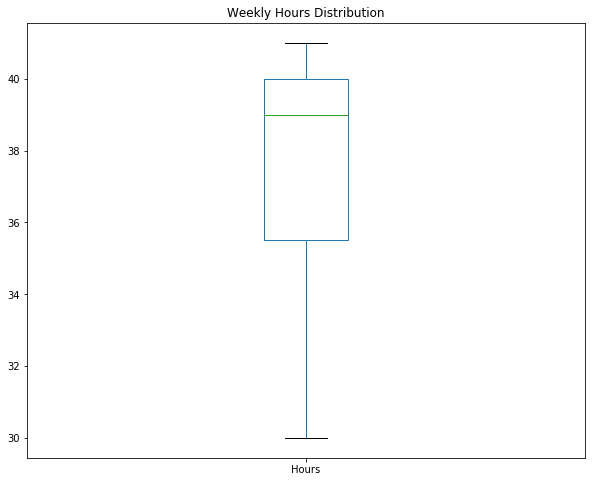

In [41]:
df_hours.plot(kind='box', title='Weekly Hours Distribution', figsize=(10,8))
plt.show()

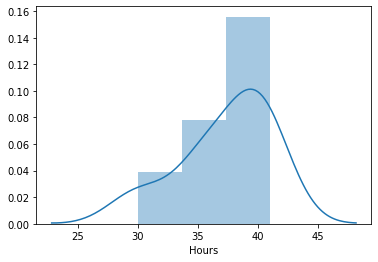

In [42]:
sns.distplot(df_hours)

0    100000
1    108000
2    100000
3    378000
4    110000
5     80000
6    118000
Name: Salary, dtype: int64


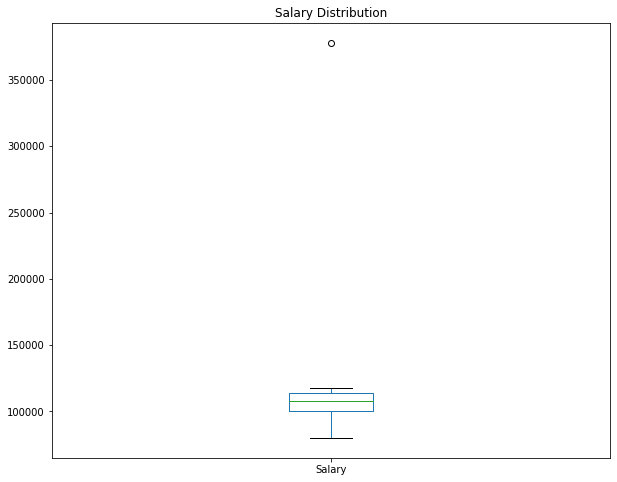

In [44]:
print(df_salary)
df_salary.plot(kind='box', title='Salary Distribution', figsize=(10,8))

In [5]:
# Remove Outliers from the BoxPlot as shown in class

#### Variance and Standard Deviation

In [45]:
df_grade = df_data2['Grade']
print(df_grade)
print(df_grade.var())

0    50
1    50
2    46
3    95
4    50
5     5
6    57
Name: Grade, dtype: int64
685.6190476190476


#### The higher the variance, the more spread your data is around the mean.

In [46]:
print(df_grade.std())

26.184328282754315


In [ ]:
# Follow the class lecture for remaing code not present in this notebook

In [48]:
from scipy import stats
import numpy as np

print(df_grade)
zscore = np.abs(stats.zscore(df_grade))
print('Z-score is:' , zscore)

0    50
1    50
2    46
3    95
4    50
5     5
6    57
Name: Grade, dtype: int64
Z-score is: [0.0176789  0.0176789  0.18268194 1.83860532 0.0176789  1.87396311
 0.27107642]


In [49]:
print(df_grade)
z = (stats.zscore(df_grade))
print(z)

0    50
1    50
2    46
3    95
4    50
5     5
6    57
Name: Grade, dtype: int64
[-0.0176789  -0.0176789  -0.18268194  1.83860532 -0.0176789  -1.87396311
  0.27107642]


In [50]:
mu = df_grade.mean()
print(mu)

50.42857142857143


In [51]:
std = df_grade.std()
print(std)

26.184328282754315


In [52]:
df_grade.describe()

count     7.000000
mean     50.428571
std      26.184328
min       5.000000
25%      48.000000
50%      50.000000
75%      53.500000
max      95.000000
Name: Grade, dtype: float64